In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_log_error, explained_variance_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
# Load and preprocess data
data = pd.read_csv('/content/synthetic_cibil_scores.csv')
data.head()

,Payment_History,Credit_Utilization,Credit_Age,Number_of_Accounts,Hard_Inquiries,Debt_to_Income_Ratio,CIBIL_Score
0,51,0.314588,18,8,2,0.091025,300.00
1,92,0.512089,22,8,1,0.687709,330.74
2,14,0.940690,24,2,9,0.672397,300.00
3,71,0.047781,17,12,6,0.950627,300.00
4,60,0.352231,6,9,3,0.371552,300.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Payment_History       10000 non-null  int64  
 1   Credit_Utilization    10000 non-null  float64
 2   Credit_Age            10000 non-null  int64  
 3   Number_of_Accounts    10000 non-null  int64  
 4   Hard_Inquiries        10000 non-null  int64  
 5   Debt_to_Income_Ratio  10000 non-null  float64
 6   CIBIL_Score           10000 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 547.0 KB


In [ ]:
data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
Payment_History,51.000000,92.000000,14.000000,71.000000,60.000000,20.000000,82.000000,86.000000,74.000000,74.000000,...,7.000000,22.000000,63.000000,92.000000,19.000000,15.000000,16.000000,79.000000,18.000000,7.000000
Credit_Utilization,0.314588,0.512089,0.940690,0.047781,0.352231,0.856572,0.396054,0.199157,0.424794,0.385553,...,0.973941,0.045504,0.950968,0.581937,0.795728,0.430393,0.453838,0.879326,0.895934,0.238689
Credit_Age,18.000000,22.000000,24.000000,17.000000,6.000000,25.000000,15.000000,13.000000,26.000000,26.000000,...,29.000000,9.000000,4.000000,5.000000,7.000000,26.000000,7.000000,11.000000,10.000000,11.000000
Number_of_Accounts,8.000000,8.000000,2.000000,12.000000,9.000000,11.000000,4.000000,1.000000,1.000000,5.000000,...,4.000000,10.000000,11.000000,2.000000,2.000000,12.000000,6.000000,8.000000,7.000000,7.000000
Hard_Inquiries,2.000000,1.000000,9.000000,6.000000,3.000000,0.000000,0.000000,3.000000,4.000000,4.000000,...,9.000000,3.000000,5.000000,1.000000,9.000000,2.000000,1.000000,9.000000,1.000000,6.000000
Debt_to_Income_Ratio,0.091025,0.687709,0.672397,0.950627,0.371552,0.305438,0.172393,0.265289,0.501891,0.837713,...,0.743552,0.699867,0.460524,0.274420,0.285003,0.731168,0.626036,0.584884,0.652609,0.774786
CIBIL_Score,300.000000,330.740000,300.000000,300.000000,300.000000,300.000000,300.020000,305.420000,300.000000,300.000000,...,300.000000,300.000000,300.000000,313.160000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000


In [ ]:
#checking if there are any null values
data.isnull().sum().sum()

0

In [ ]:
#since 'Credit_Score' is out target column, let's see the unique values there and what percentage each of them contributes
data['CIBIL_Score'].value_counts(normalize=True) * 100

,proportion
CIBIL_Score,
300.00,83.14
300.01,0.25
300.04,0.23
300.02,0.20
300.06,0.14
...,...
336.18,0.01
319.47,0.01
312.20,0.01


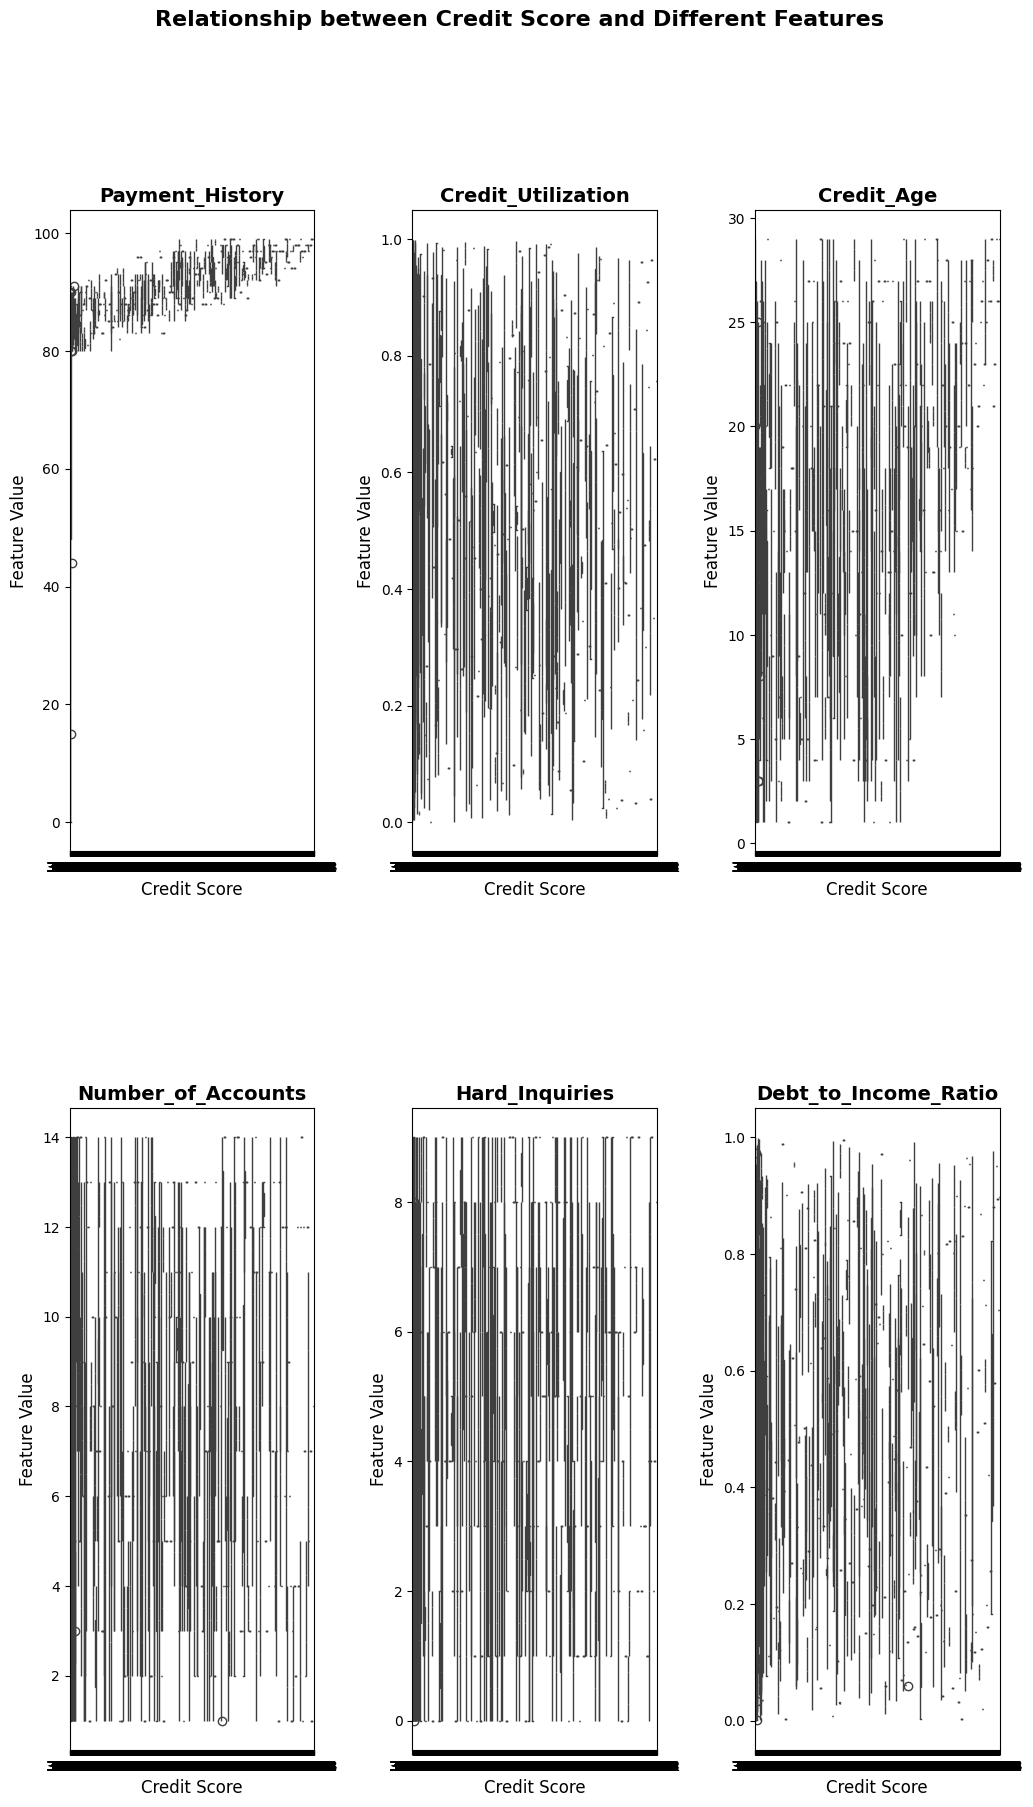

In [ ]:
# Create a figure and a 2x3 grid of subplots
fig, ax = plt.subplots(2, 3, figsize=(12, 20))

# Flatten the 2D array of subplots into a 1D array
ax = ax.flatten()

# Define titles for each subplot
titles = ['Payment_History', 'Credit_Utilization', 'Credit_Age', 'Number_of_Accounts', 'Hard_Inquiries', 'Debt_to_Income_Ratio']

# Plot multiple box plots on the same axis and set titles
sns.boxplot(x='CIBIL_Score', y='Payment_History', data=data, ax=ax[0])
sns.boxplot(x='CIBIL_Score', y='Credit_Utilization', data=data, ax=ax[1])
sns.boxplot(x='CIBIL_Score', y='Credit_Age', data=data, ax=ax[2])
sns.boxplot(x='CIBIL_Score', y='Number_of_Accounts', data=data, ax=ax[3])
sns.boxplot(x='CIBIL_Score', y='Hard_Inquiries', data=data, ax=ax[4])
sns.boxplot(x='CIBIL_Score', y='Debt_to_Income_Ratio', data=data, ax=ax[5])

# Customize each subplot
for i in range(6):
    ax[i].set_title(titles[i], fontsize=14, fontweight='bold')
    ax[i].set_xlabel('Credit Score', fontsize=12)
    ax[i].set_ylabel('Feature Value', fontsize=12)
    ax[i].grid(color='white', linestyle='-', linewidth=0.5, alpha=0.5)

# Add a main title and adjust subplot spacing
fig.suptitle('Relationship between Credit Score and Different Features', fontsize=16, fontweight='bold')
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Show the plot
plt.show()


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Prepare time-series data
def create_dataset(data, time_step=7):
    X, y = [], []
    for i in range(len(data) - time_step - 1):  # Adjust loop to avoid overlap
        X.append(data[i:(i + time_step), :])  # Select all features for each timestep
        y.append(data[i + time_step, :])   # Select all features for the target
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)

# Reshape data for LSTM (no change needed here)
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])  # Keep the original number of features

In [ ]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(y.shape[1]))  # Output layer should match the number of target features

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import MeanAbsolutePercentageError
from tensorflow.keras import backend as K
# Define custom metrics
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

def r_squared(y_true, y_pred):
    ss_res = K.sum(K.square(y_true - y_pred))
    ss_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - ss_res / (ss_tot + K.epsilon())
def custom_accuracy(y_true, y_pred, threshold=10):
    diff = K.abs(y_true - y_pred)
    correct = K.less_equal(diff, threshold)
    accuracy = K.mean(K.cast(correct, K.floatx()))
    return accuracy

# Compile the model with the custom accuracy metric
model.compile(optimizer='adam',
              loss=MeanSquaredError(),
              metrics=[MeanAbsoluteError(), MeanAbsolutePercentageError(), rmse, r_squared, custom_accuracy])

# Train the model
history = model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - custom_accuracy: 1.0000 - loss: 0.1114 - mean_absolute_error: 0.2666 - mean_absolute_percentage_error: 20445718.0000 - r_squared: -0.0579 - rmse: 0.3246 - val_custom_accuracy: 1.0000 - val_loss: 0.0829 - val_mean_absolute_error: 0.2334 - val_mean_absolute_percentage_error: 14694620.0000 - val_r_squared: 0.2110 - val_rmse: 0.2878
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - custom_accuracy: 1.0000 - loss: 0.0816 - mean_absolute_error: 0.2361 - mean_absolute_percentage_error: 21211286.0000 - r_squared: 0.2236 - rmse: 0.2856 - val_custom_accuracy: 1.0000 - val_loss: 0.0816 - val_mean_absolute_error: 0.2339 - val_mean_absolute_percentage_error: 17475154.0000 - val_r_squared: 0.2237 - val_rmse: 0.2854
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - custom_accuracy: 1.0000 - loss: 0.0816 - mean_absolute_error: 0.2362 - mean_absolute_percentage_error: 20811904.0000 - r_squared: 0.2223 - rmse: 0.2855 - val_custom_accuracy:

In [ ]:
# Predict CIBIL scores for the next 7 days
predicted_cibil_scores = model.predict(X[-100:])
predicted_cibil_scores = scaler.inverse_transform(predicted_cibil_scores)
print(predicted_cibil_scores)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step
[[ 49.599293     0.4848405   13.887745     6.9368057    4.1563225
    0.51845294 302.87476   ]
 [ 46.727016     0.47071555  14.05491      7.1705036    4.253587
    0.51015157 302.44534   ]
 [ 44.740917     0.43844688  14.950663     8.200132     4.2017703
    0.49258637 301.8603    ]
 [ 48.107018     0.4791288   15.302116     8.2214155    4.328909
    0.48001838 302.92758   ]
 [ 50.16258      0.48507687  14.5649395    7.835113     4.4279494
    0.5191574  303.37955   ]
 [ 50.674553     0.48447925  13.98857      7.394477     4.237282
    0.51763994 303.1462    ]
 [ 51.48938      0.48142532  13.699723     7.171876     4.283107
    0.5372701  302.64532   ]
 [ 52.628006     0.45396736  13.598615     7.2564683    4.4086194
    0.51242554 302.86914   ]
 [ 50.692707     0.4345286   14.479504     7.7410216    4.369875
    0.51815677 302.57492   ]
 [ 48.579376     0.4443134   13.965963     7.650251     4.3032055
    0.50755787 302.50992   ]
 [ 49.467438     

In [ ]:
model.save('cibil_score.h5')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
from keras.metrics import MeanAbsoluteError

class CustomMeanAbsoluteError(MeanAbsoluteError):
    def __init__(self, name='mean_absolute_error', **kwargs):
        # Remove the 'reduction' argument if it exists
        if 'reduction' in kwargs:
            kwargs.pop('reduction')
        super().__init__(name=name, **kwargs)

    @classmethod
    def from_config(cls, config):
        # Handle custom configurations if needed
        return cls(**config)

# Use CustomMeanAbsoluteError when loading the model
from keras.models import load_model

def custom_objects():
    return {
        'MeanAbsoluteError': CustomMeanAbsoluteError,
        # Add other custom objects if necessary
    }

model = load_model('/content/cibil_score.h5', custom_objects=custom_objects())
# Saving the model
model.save('cibil_score.h5')

# You likely don't need custom objects when loading again if you saved with the fix above
model = load_model('/content/cibil_score.h5')

loaded_model = load_model('cibil_score.h5')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [ ]:
model = load_model('cibil_score.h5', custom_objects={
    'rmse': rmse,
    'r_squared': r_squared,
    'custom_accuracy': custom_accuracy
})

X_test, y_test = create_dataset(scaled_data)

predicted_scores = model.predict(X_test)
predicted_scores = scaler.inverse_transform(predicted_scores)
y_test_original = scaler.inverse_transform(y_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test_original, predicted_scores)
mse = mean_squared_error(y_test_original, predicted_scores)
rmse_value = math.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_original, predicted_scores)
r2 = r2_score(y_test_original, predicted_scores)
msle = mean_squared_log_error(y_test_original, predicted_scores)
explained_variance = explained_variance_score(y_test_original, predicted_scores)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse_value}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R-squared (R²): {r2}")
print(f"Mean Squared Logarithmic Error (MSLE): {msle:.4f}")
print(f"Explained Variance Score: {explained_variance:.4f}")

# If you need custom accuracy with a threshold, you can also compute it manually
threshold = 10  # Adjust threshold as needed
diff = np.abs(y_test_original - predicted_scores)
custom_accuracy_value = np.mean((diff <= threshold).astype(float)) * 100
print(f"Custom Accuracy (within {threshold} points): {custom_accuracy_value:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Mean Absolute Error (MAE): 6.239397772903743
Mean Squared Error (MSE): 145.56965445563205
Root Mean Squared Error (RMSE): 12.065225006423711
Mean Absolute Percentage Error (MAPE): 561718744742937.44
R-squared (R²): 0.004693618924344167
Mean Squared Logarithmic Error (MSLE): 0.3369
Explained Variance Score: 0.0076
Custom Accuracy (within 10 points): 82.87%


In [ ]:
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 7, 50)               │          11,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             182 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,259 (129.92 KB)

 Trainable params: 33,257 (129.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
X = data[['Payment_History',	'Credit_Utilization',	'Credit_Age',	'Number_of_Accounts',
'Hard_Inquiries',	'Debt_to_Income_Ratio']].values
y = data['CIBIL_Score'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor # Import Regressor instead of Classifier
model = RandomForestRegressor(n_estimators=300) # Initialize Regressor
model.fit(X_train, y_train) # Fit the model

RandomForestRegressor(n_estimators=300)

In [ ]:
# Reshape X_test to 2 dimensions is unnecessory and cuases the error. so instead of this:
#X_test = X_test.reshape(X_test.shape[0], -1)
# Instead, ensure X_test has the correct features:
# Assuming 'CIBIL_Score' is the target column and has index 6
X_test = X_test[:, :6]  # Select the first 6 columns of X_test

y_pred = model.predict(X_test)

# Clip predictions to 0
y_pred = np.clip(y_pred, 0, None)

# Evaluate the model
# Assuming 'CIBIL_Score' is the target column and has index 6
mse = mean_squared_error(y_test, y_pred)  # Select the target column from y_test
r2 = r2_score(y_test, y_pred)  # Select the target column from y_test
mae = mean_absolute_error(y_test, y_pred)  # Select the target column from y_test
mape = mean_absolute_percentage_error(y_test, y_pred)  # Select the target column from y_test
msle = mean_squared_log_error(y_test, y_pred)  # Select the target column from y_test
explained_variance = explained_variance_score(y_test, y_pred)  # Select the target column from y_test
rmse_value = math.sqrt(mse)
# Print metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse_value}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Squared Logarithmic Error (MSLE): {msle:.4f}")
print(f"Explained Variance Score: {explained_variance:.4f}")
threshold = 10  # Adjust threshold as needed
diff = np.abs(y_test_original - predicted_scores)
custom_accuracy_value = np.mean((diff <= threshold).astype(float)) * 100
print(f"Custom Accuracy (within {threshold} points): {custom_accuracy_value:.2f}%")

Mean Squared Error: 0.22
R-squared: 1.00
Mean Absolute Error (MAE): 0.13772433333332698
Root Mean Squared Error (RMSE): 0.4665083053428548
Mean Absolute Percentage Error (MAPE): 0.0004279557353261625
Mean Squared Logarithmic Error (MSLE): 0.0000
Explained Variance Score: 0.9979
Custom Accuracy (within 10 points): 82.83%


Gradient Boosting

In [ ]:
pip install xgboost lightgbm scikit-learn

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error, explained_variance_score, mean_absolute_percentage_error


In [ ]:
model_xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_xgb = model_xgb.predict(X_test)
y_test_target = y_test
model_xgb.fit(X_train, y_train)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)  # Select the target column from y_test
r2 = r2_score(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred_xgb)  # Select the target column from y_test
msle = mean_squared_log_error(y_test, y_pred_xgb)
explained_var_xgb = explained_variance_score(y_test, y_pred_xgb)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse_value}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Squared Logarithmic Error (MSLE): {msle:.4f}")
print(f"Explained Variance Score: {explained_variance:.4f}")
threshold = 10  # Adjust threshold as needed
diff = np.abs(y_test_original - predicted_scores)
custom_accuracy_value = np.mean((diff <= threshold).astype(float)) * 100
print(f"Custom Accuracy (within {threshold} points): {custom_accuracy_value:.2f}%")

Mean Squared Error: 0.19
R-squared: 1.00
Mean Absolute Error (MAE): 0.13772433333332698
Root Mean Squared Error (RMSE): 0.4665083053428548
Mean Absolute Percentage Error (MAPE): 0.00047261066250264724
Mean Squared Logarithmic Error (MSLE): 0.0000
Explained Variance Score: 0.9979
Custom Accuracy (within 10 points): 82.83%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
import lightgbm as lgb

model_lgb = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, force_col_wise=True)

In [ ]:
model_lgb.fit(X_train, y_train)

[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 6
[LightGBM] [Info] Start training from score 303.246937
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

LGBMRegressor(force_col_wise=True, max_depth=5, random_state=42)

In [ ]:
# Fit the model first
model_lgb.fit(X_train, y_train)

# Then, make predictions
y_pred_lgb = model_lgb.predict(X_test)

# The rest of your code remains the same
y_test_target = y_test

[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 6
[LightGBM] [Info] Start training from score 303.246937
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [ ]:
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
mse = mean_squared_error(y_test, y_pred_lgb)  # Select the target column from y_test
r2 = r2_score(y_test, y_pred_lgb)
rmse_lgb = mean_squared_error(y_test, y_pred_lgb, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred_lgb)  # Select the target column from y_test
msle = mean_squared_log_error(y_test, y_pred_lgb)
explained_var_lgb = explained_variance_score(y_test, y_pred_lgb)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse_value}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Squared Logarithmic Error (MSLE): {msle:.4f}")
print(f"Explained Variance Score: {explained_variance:.4f}")
threshold = 10  # Adjust threshold as needed
diff = np.abs(y_test_original - predicted_scores)
custom_accuracy_value = np.mean((diff <= threshold).astype(float)) * 100
print(f"Custom Accuracy (within {threshold} points): {custom_accuracy_value:.2f}%")

Mean Squared Error: 0.21
R-squared: 1.00
Mean Absolute Error (MAE): 0.13772433333332698
Root Mean Squared Error (RMSE): 0.4665083053428548
Mean Absolute Percentage Error (MAPE): 0.0004958936974010509
Mean Squared Logarithmic Error (MSLE): 0.0000
Explained Variance Score: 0.9979
Custom Accuracy (within 10 points): 82.83%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Feedforword Neural Networks

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Build the Feedforward Neural Network
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
    layers.Dense(32, activation='relu'),  # Second hidden layer
    layers.Dense(16, activation='relu'),  # Third hidden layer
    layers.Dense(1)  # Output layer (for regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluation metrics
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
mse = mean_squared_error(y_test, y_pred_lgb)  # Select the target column from y_test
r2 = r2_score(y_test, y_pred_lgb)
rmse_lgb = mean_squared_error(y_test, y_pred_lgb, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred_lgb)  # Select the target column from y_test
msle = mean_squared_log_error(y_test, y_pred_lgb)
explained_var_lgb = explained_variance_score(y_test, y_pred_lgb)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse_value}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Squared Logarithmic Error (MSLE): {msle:.4f}")
print(f"Explained Variance Score: {explained_variance:.4f}")
threshold = 10  # Adjust threshold as needed
diff = np.abs(y_test_original - predicted_scores)
custom_accuracy_value = np.mean((diff <= threshold).astype(float)) * 100
print(f"Custom Accuracy (within {threshold} points): {custom_accuracy_value:.2f}%")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 85637.0938 - mae: 291.1053 - val_loss: 5386.8594 - val_mae: 65.0922
Epoch 2/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2123.0044 - mae: 36.6139 - val_loss: 1317.3408 - val_mae: 28.6902
Epoch 3/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1151.7615 - mae: 26.9656 - val_loss: 1096.1372 - val_mae: 26.1270
Epoch 4/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 941.2351 - mae: 24.5639 - val_loss: 905.6967 - val_mae: 23.7744
Epoch 5/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 757.9415 - mae: 21.9888 - val_loss: 744.7260 - val_mae: 21.6380
Epoch 6/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 632.4772 - mae: 20.1047 - val_loss: 581.5444 - val_mae: 19.2517
Epoch 7/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 489.4315 - mae: 17.8579 - val_loss: 448.2420 - val_mae: 16.9303
Epoch 8/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 366.8114 - mae: 15.3847 - val_loss: 332.8909 - val_mae: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
